In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

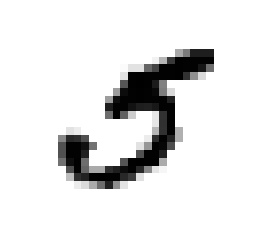

In [36]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [13]:
y[36041]

6.0

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

In [20]:
# Implementing Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9686
0.96675
0.9371


In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9686 ,  0.96675,  0.9371 ])

In [22]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [23]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9111 ,  0.9081 ,  0.90975])

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53040,  1539],
       [ 1012,  4409]])

In [26]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [27]:
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [32]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.74125756556825828

In [33]:
recall_score(y_train_5, y_train_pred)

0.81331857590850398

In [50]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.77561790834726008

In [51]:
y_scores = sgd_clf.decision_function([some_digit])

In [52]:
y_scores

array([[-200299.39149319, -408561.84183864, -433275.08950638,
         -97086.39057861, -366045.18790131,   30888.61138712,
        -708052.41522881, -349839.36236307, -600909.32023857,
        -906814.84509726]])

In [40]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [44]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [42]:
y_scores

array([-640063.19815541, -424065.6061276 , -694926.05816964, ...,
       -303707.63809576, -366415.86052472, -501411.6565237 ])

In [43]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

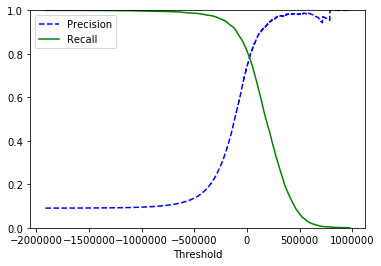

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [47]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [53]:
np.argmax(y_scores)

5

In [54]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [56]:
sgd_clf.classes_[5]

5.0

In [57]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array([ 5.])

In [58]:
len(ovo_clf.estimators_)

45

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [60]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [61]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0.1,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [63]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85007998,  0.85504275,  0.85382807])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled, y_train,cv=3,scoring="accuracy")

array([ 0.91006799,  0.91479574,  0.90678602])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_trian, y_train_pred)
